In [18]:
#1. Pokrocile transformace
import pandas as pd
# Načtení dat z CSV souboru
url ='https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv'

'''
Sumu srážek po letech a lokalitách
'''

df = pd.read_csv(url,sep=";")
df["ROK"] = pd.to_datetime(df["DATE"]).dt.year
df = df.groupby(by=["NAME","ROK"])["PRCP"].sum()
df = df.to_frame()
df = df.unstack(level=0)
df.head()

PRCP                                                            \
NAME   GRAZ KOSICE MOSNOV PIDING PRAHA KLEMENTINUM PRAHA LIBUS RUZYNE   
ROK                                                                     
2000  755.3  530.8  502.3    NaN             385.9       163.6  353.9   
2001  534.3  566.4  629.0    NaN             552.0       277.3  499.3   
2002  872.1  648.4  504.4    NaN             661.5       733.6  605.0   
2003  660.8  491.9  448.9    NaN             267.1       275.9  294.8   
2004  899.5  645.8  512.2    NaN             394.2       425.7  472.0   

                             
NAME SALZBURG TURANY   WIEN  
ROK                          
2000   1165.7  404.9  537.5  
2001   1172.7  538.4  423.5  
2002   1387.2  481.6  813.5  
2003    953.0  458.2  446.9  
2004   1134.2  447.1  665.4

In [19]:
#1. Pokrocile transformace
import pandas as pd
# Načtení dat z CSV souboru
url ='https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv'

'''
Sumu srážek po letech a lokalitách
'''

df = pd.read_csv(url,sep=";")

df = pd.melt(df,id_vars=["STATION","NAME","DATE"])
df.head()

STATION    NAME        DATE variable  value
0  GME00132274  PIDING  2006-12-01     PRCP    0.0
1  GME00132274  PIDING  2006-12-02     PRCP    0.0
2  GME00132274  PIDING  2006-12-03     PRCP    0.0
3  GME00132274  PIDING  2006-12-04     PRCP   19.0
4  GME00132274  PIDING  2006-12-05     PRCP    0.0

In [20]:
#1. Pokrocile transformace
import pandas as pd
import numpy as np
# Načtení dat z CSV souboru
url ='https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv'

'''
Sumu srážek po letech a lokalitách
'''

df = pd.read_csv(url,sep=";")
df["TYP_SRAZEK"] = pd.cut(df["PRCP"],bins=[-np.inf,0,10,50,np.inf],labels=["NEPRSELO","PRSELO MALO","PRSELO","PRSELO MOC"])

pd.crosstab(df["NAME"],df["TYP_SRAZEK"])



TYP_SRAZEK         NEPRSELO  PRSELO MALO  PRSELO  PRSELO MOC
NAME                                                        
GRAZ                   1907         1584     494          19
KOSICE                 4621         2511     417          13
MOSNOV                 4410         2541     374           5
PIDING                 2412         2119     541          12
PRAHA KLEMENTINUM      1166          732      49           0
PRAHA LIBUS            4210         2638     313          10
RUZYNE                 4403         2609     251           9
SALZBURG               1588         2122     698          22
TURANY                 4615         2341     305           8
WIEN                   1979         2064     363           8

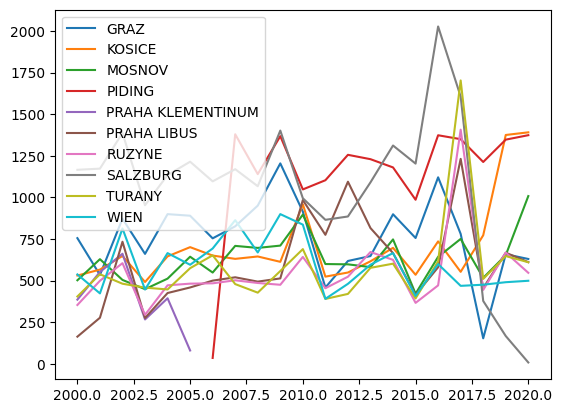

In [21]:
#1. Pokrocile transformace
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# Načtení dat z CSV souboru
url ='https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv'
df = pd.read_csv(url,sep=";")
df["ROK"] = pd.to_datetime(df["DATE"]).dt.year


df = pd.pivot_table(df,values="PRCP",index="ROK",columns="NAME",aggfunc="sum")

fig,ax  = plt.subplots()

for c in df.columns:
    ax.plot(df.index,df[c],label=c)

plt.legend()
plt.show()

In [22]:
#1. Pokrocile transformace
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# Načtení dat z CSV souboru
url ='https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv'
df = pd.read_csv(url,sep=";")
df["ROK"] = pd.to_datetime(df["DATE"]).dt.year


df["ROZDIL"] = df["TMAX"] - df["TMIN"]
df.sort_values(by="ROZDIL",ascending=False)

STATION    NAME        DATE  PRCP  SNWD  TAVG  TMAX  TMIN   ROK  \
44402  AU000016402    GRAZ  2019-02-28   NaN   NaN   9.9  23.0  -3.9  2019   
1975   GME00132274  PIDING  2012-04-28   0.0   0.0   NaN  30.5   4.9  2012   
1974   GME00132274  PIDING  2012-04-27   0.0   0.0   NaN  29.1   3.7  2012   
4875   GME00132274  PIDING  2020-04-06   0.0   0.0   NaN  21.9  -3.5  2020   
41890  AU000016402    GRAZ  2012-03-17   NaN   NaN  11.4  23.6  -1.4  2012   
...            ...     ...         ...   ...   ...   ...   ...   ...   ...   
67829  EZM00011723  TURANY  2020-11-14   0.0   NaN   6.2   NaN   NaN  2020   
67830  EZM00011723  TURANY  2020-11-15   0.0   NaN   6.6   NaN   5.7  2020   
67831  EZM00011723  TURANY  2020-11-16   0.5   NaN   5.9   NaN   NaN  2020   
67832  EZM00011723  TURANY  2020-11-17   0.0   NaN   6.5   NaN   1.7  2020   
67833  EZM00011723  TURANY  2020-11-18   0.0   NaN   7.9  12.7   NaN  2020   

       ROZDIL  
44402    26.9  
1975     25.6  
1974     25.4  
4875     25.4  
41890    25.0  
...       ...  
67829     NaN  
67830     NaN  
67831     NaN  
67832     NaN  
67833     NaN  

[67834 rows x 10 columns]

In [34]:
#1. Pokrocile transformace
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# Načtení dat z CSV souboru
url ='https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv'
url_lokality = "https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data_lokality.csv"


df = pd.read_csv(url,sep=";")
df_lokality = pd.read_csv(url_lokality,sep=";")
#df = df.join(df_lokality,how="left")

df = pd.merge(left=df,right=df_lokality["ZEME"],how="left",left_on="NAME",right_on=df_lokality["STANICE"])

df.head(20)

STATION    NAME        DATE  PRCP  SNWD  TAVG  TMAX  TMIN      ZEME
0   GME00132274  PIDING  2006-12-01   0.0   0.0   NaN   4.2   1.0  Rakousko
1   GME00132274  PIDING  2006-12-02   0.0   0.0   NaN   1.8  -1.7  Rakousko
2   GME00132274  PIDING  2006-12-03   0.0   0.0   NaN   5.1  -4.6  Rakousko
3   GME00132274  PIDING  2006-12-04  19.0   0.0   NaN   8.3  -0.9  Rakousko
4   GME00132274  PIDING  2006-12-05   0.0   0.0   NaN  12.0   0.9  Rakousko
5   GME00132274  PIDING  2006-12-06   2.2   0.0   NaN  13.3   1.0  Rakousko
6   GME00132274  PIDING  2006-12-07   0.0   0.0   NaN   8.6  -0.1  Rakousko
7   GME00132274  PIDING  2006-12-08   0.0   0.0   NaN  18.3  -1.7  Rakousko
8   GME00132274  PIDING  2006-12-09   6.8   0.0   NaN   9.3   2.2  Rakousko
9   GME00132274  PIDING  2006-12-10   1.0   0.0   NaN   4.6  -3.6  Rakousko
10  GME00132274  PIDING  2006-12-11   0.0   0.0   NaN   4.1  -5.8  Rakousko
11  GME00132274  PIDING  2006-12-12   0.0   0.0   NaN   5.7  -3.4  Rakousko
12  GME00132274  PIDING  2006-12-13   0.0   0.0   NaN   7.5  -5.0  Rakousko
13  GME00132274  PIDING  2006-12-14   0.0   0.0   NaN   7.8  -5.5  Rakousko
14  GME00132274  PIDING  2006-12-15   0.0   0.0   NaN   8.3  -6.0  Rakousko
15  GME00132274  PIDING  2006-12-16   1.0   0.0   NaN  10.2  -4.2  Rakousko
16  GME00132274  PIDING  2006-12-17   3.0   0.0   NaN   6.5  -1.4  Rakousko
17  GME00132274  PIDING  2006-12-18   0.6   0.0   NaN   2.4   0.6  Rakousko
18  GME00132274  PIDING  2006-12-19   0.0   0.0   NaN   1.5  -3.7  Rakousko
19  GME00132274  PIDING  2006-12-20   0.0   0.0   NaN   1.9  -7.5  Rakousko

In [39]:
#1. Pokrocile transformace
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# Načtení dat z CSV souboru
url ='https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv'
url_lokality = "https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data_lokality.csv"


df = pd.read_csv(url,sep=";")
df_lokality = pd.read_csv(url_lokality,sep=";")

df_ruzyne = df.loc[df["NAME"]=="RUZYNE",["DATE","NAME","PRCP"]]
df_mosnov = df.loc[df["NAME"]=="MOSNOV",["DATE","NAME","PRCP","TMAX"]]

df_ruzyne = df_ruzyne.reset_index(drop=True)
df_mosnov = df_mosnov.reset_index(drop=True)

df_vse = pd.concat([df_ruzyne,df_mosnov],axis=0)

df_vse.head()

DATE    NAME  PRCP  TMAX
0  2000-01-01  RUZYNE   NaN   NaN
1  2000-01-02  RUZYNE   NaN   NaN
2  2000-01-03  RUZYNE   0.0   NaN
3  2000-01-04  RUZYNE   NaN   NaN
4  2000-01-05  RUZYNE   NaN   NaN